# Instacart Market Basket Analysis

# 🛒 Instacart EDA Project Introduction

A project introduction is crucial to provide context and clarity to your work. Please ensure to include this element in your future projects.

## 🔍 Overview

With the rise of on-demand grocery delivery services, companies like Instacart have accumulated large volumes of customer and order data. Understanding customer shopping behaviors can drive smarter recommendations, efficient inventory management, and better customer experiences. This project focuses on exploring Instacart’s grocery order dataset to uncover insights about user behavior and purchasing patterns.

## 🎯 Project Objective

The primary objective of this project is to clean, process, and analyze Instacart's transactional data to answer key business questions about when and how customers shop. The project will involve exploratory data analysis (EDA) to surface trends and patterns, supported by visualizations and descriptive summaries.

## 📁 Dataset Description

The analysis draws on five CSV files, each contributing a specific aspect of the customer-order-product ecosystem:

- **`instacart_orders.csv`** – Information on customer orders, including order sequence, day of week, and order time.
- **`order_products.csv`** – Details of individual items purchased per order, including whether they were reordered.
- **`products.csv`** – Metadata on each product such as name, aisle, and department.
- **`aisles.csv`** – Maps aisle IDs to aisle names.
- **`departments.csv`** – Maps department IDs to department names.

These datasets have been intentionally modified to include missing and duplicate values, simulating realistic data challenges. The original structure and distributions were preserved.

## 🗺️ Project Strategy

The project will follow these steps:

1. **Data Loading & Inspection** – Import all datasets and inspect formatting issues and data types.
2. **Data Cleaning & Preprocessing** – Address missing values, duplicates, and incorrect data types.
3. **Exploratory Data Analysis (EDA)** – 
   - Analyze ordering behaviors by time and frequency.
   - Investigate product popularity and reorder trends.
   - Explore customer-level ordering patterns.
4. **Visualization & Interpretation** – Use plots with clear titles, labels, and legends to support insights.
5. **Summary of Findings** – Conclude with key takeaways that could inform business decisions.

---

By the end of this project, we aim to deliver a clean dataset and a set of actionable insights into Instacart’s customer behavior, all communicated clearly through well-documented code and visualizations.



## Importing the required libraries

In [1]:
# Import the libraries you'll need for this analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the datasets
# Note: These files use semicolon (;) as the separator instead of comma
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

## Analyze your data

In the cells below, display the datasets using `.info()` and `.head()` to gain insights into their structure and content.

- `.info()`: Provides a concise summary of the dataset, including the data types, non-null counts, and memory usage.
- `.head()`: Displays the first few rows of the dataset, offering a quick overview of the data values.

In [3]:
# In this cell, type "orders" below this line and execute the cell
orders


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [4]:
# In this cell, type "products" below this line and execute the cell
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Repeat this process for each dataset to understand the structure, including the types of columns and rows they contain. Add additional code cells as needed for your analysis.

In [5]:
# In this cell, type "orders.info() below this line and execute the cell
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


The "Non-Null Count" column provides information about any missing values in each column of the dataset. With a total of 478,967 entries, observe any columns where the non-null count is less than this number to identify missing values.

In [6]:
# In this cell, run orders_products.info() below, but include the argument show_counts=True since this is a large file.
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Repeat the use of .info() on the remaining datasets to identify missing values and understand their structure. Check the "Non-Null Count" for each dataset to spot any columns with missing values.

In [7]:
products.info()
print()
departments.info()
print()
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    obje

## Find and Remove Missing Values

We noticed that some columns contain missing values.

Here are some useful code snippets:

```python
# Identify missing values in each column
print(dataset.isnull().sum())

# Display rows where a specific column has missing values
print(dataset[dataset['column_name'].isna()])

# Confirm no missing values remain
print(dataset.isnull().sum())
```

### `products` Data Frame

We will begin by addressing the missing values in the `products` data frame.

In [8]:
# Display rows where the product_name column has missing values
view_missing_prod_name = products[products['product_name'].isna()]
view_missing_prod_name

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


It seems suspicious that all rows with missing `product_name` might be associated with `aisle_id` 100 and `department_id` 21. Let’s verify this by checking if any rows with missing `product_name` have an `aisle_id` different from 100 and 21. This will help us confirm if the issue is isolated to this aisle or spread across others.

In [9]:
# Combine conditions to check for missing product names in aisles other than 100
verify_condition_aisles = view_missing_prod_name[view_missing_prod_name['aisle_id']!=100]
print(verify_condition_aisles)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [10]:
# Combine conditions to check for missing product names in departments other than 21
verify_condition_department = view_missing_prod_name[view_missing_prod_name['department_id']!=21]
print(verify_condition_department)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


To better understand the missing product_name values, let’s determine what department_id 21 and aisle_id 100 represent by referencing the departments and aisles tables.

In [11]:
# What is this aisle and department?
research_department = departments[departments['department_id']==21]
research_aisle = aisles[aisles['aisle_id']==100]
print(research_department)
print()
print(research_aisle)

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


In [12]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna(value= 'Unknown', inplace=True)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### `orders` data frame

Now let's fill in missing values from the `orders` table.

In [13]:
# Display rows where the days_since_prior_order column has missing values
view_missing_ds_pr_order = orders[orders['days_since_prior_order'].isna()]
print(view_missing_ds_pr_order)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [14]:
# Are there any missing values where it's not a customer's first order?
verify_first_order = view_missing_ds_pr_order[view_missing_ds_pr_order['order_number']>1]
print(verify_first_order)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


All of the missing `'days_since_prior_order'` values correspond to a customer's first ever order. This makes sense because there is no prior order! We'll leave the values as `NaN` so the column can remain numeric. Also, the `NaN` values shouldn't interfere with any calculations we might do using this column.

### `order_products` data frame

Now let's fill in missing values from the order_products table.

In [15]:
# Display rows where the add_to_cart_order column has missing values
view_missing_at_cart = order_products[order_products['add_to_cart_order'].isna()]
print(view_missing_at_cart)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [16]:
# Use .min() and .max() to find the minimum and maximum values for this column.
min_max = [order_products['add_to_cart_order'].min(), 
           order_products['add_to_cart_order'].max()]
print(f"The minimum and maximum values for this column are: {min_max[0]} , {min_max[1]} ")

The minimum and maximum values for this column are: 1.0 , 64.0 


In [17]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
verify_ids = view_missing_at_cart['order_id'].unique()
print(verify_ids)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [18]:
# Do all orders with missing values have more than 64 products?
df_filtered = order_products.query("order_id in @verify_ids")
print(df_filtered['order_id'].value_counts(ascending= True))
df_filtered2 = order_products.query("order_id in @verify_ids and add_to_cart_order >= 64 ")
print()
print(df_filtered2) 
print()
print("All orders have a max numeric value of 64 products in cart and minimum of 65 occurences.")
print("All orders have more than 64 products.")

9310        65
2652650     65
1677118     65
2621907     65
1598369     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: order_id, Length: 70, dtype: int64

         order_id  product_id  add_to_cart_order  reordered
76044     1386261       31847               64.0          0
154176     854647       22922               64.0          0
177733    3383594        7970               64.0          0
213282    2470674       30257               64.0          0
233518    1968313         495               64.0          1
...           ...         ...                ...        ...
4148751   2999801       24722               64.0          1
4235552   3308010        3888               64.0          1
4409436    747668       31268               64.0          0
4419785   1633337          34               64.0          0
4432234      9310       21332               64.0          0

[70 rows x 4 columns]

All orders have a max numeric value of 64 product

In [19]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')



order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


For some reason, any item placed in the cart 65th or later has a missing value in the `'add_to_cart_order'` column. Maybe the data type of that column in the database could only hold integer values from 1 to 64. We've decided to replace the missing values with a code value, 999, that represents an unknown placed in cart order above 64. We also converted the column to integer data type. We just need to be careful to remember this if we perform calculations using this column during our analysis.

Other sensible code values we could've used are 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

Also note that, for orders with exactly 65 items, we could replace the missing value with 65. But we're going to neglect that for now since we can't determine the 65th item for all orders with 66 items or more.

## Find and Remove Duplicate Values from All the Datasets

Each dataset may contain duplicate rows, which can lead to redundancy and affect the accuracy of our analysis. To handle this:

1. Use the `.duplicated()` method to identify duplicate rows. This method returns a Boolean series where `True` indicates a duplicate row.
2. Apply the `.drop_duplicates()` method to remove these duplicate rows, ensuring a cleaner dataset.
3. Optionally, you can set the `keep` parameter in `.drop_duplicates()` to specify which duplicate to retain (`'first'` or `'last'`).

Here is some example code for reference:
```python
# Check for duplicates
print(dataset.duplicated().sum())  # Number of duplicate rows

# View duplicate rows
print(dataset[dataset.duplicated()]

# Remove duplicates
dataset = dataset.drop_duplicates().reset_index(drop=True)

# Confirm removal
print(dataset.duplicated().sum())  # Should return 0
```

Repeat this process for all datasets to ensure they are free of duplicate rows.

### `orders` data frame

In [20]:
# Find the number of duplicate rows in the orders dataframe
print(orders.duplicated().sum())

15


In [21]:
# View the duplicate rows
print(orders[orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [22]:
# Remove duplicate orders
orders = orders.drop_duplicates().reset_index(drop=True)

In [23]:
# Double check for duplicate rows
print(orders.duplicated().sum())

0


### `products` data frame

In [24]:
# Check for fully duplicate rows

print(products[products.duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [25]:
# Check for just duplicate product IDs using subset='product_id' in duplicated()
print(products.duplicated(subset='product_id').sum())

0


Hint: To identify duplicate product names more effectively, convert the names to lowercase for consistent comparison. Use the .str.lower() method on the product_name column to standardize the text before checking for duplicates.

In [26]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower() 
print(products[products.duplicated(subset='product_name')])

       product_id                                     product_name  aisle_id  \
71             72                                          unknown       100   
109           110                                          unknown       100   
296           297                                          unknown       100   
416           417                                          unknown       100   
436           437                                          unknown       100   
...           ...                                              ...       ...   
49689       49690                    high performance energy drink        64   
49690       49691                    original pancake & waffle mix       130   
49691       49692  organic instant oatmeal light maple brown sugar       130   
49692       49693                           spring water body wash       127   
49693       49694                          burrito- steak & cheese        38   

       department_id  
71              

Let's see what that looks like in our dataset :

In [27]:
products[products['product_name'].str.lower() == 'high performance energy drink']

,product_id,product_name,aisle_id,department_id
22540,22541,high performance energy drink,64,7
49689,49690,high performance energy drink,64,7


### `departments` data frame

In [29]:
# Check for duplicate entries in the departments dataframe
departments[departments.duplicated()]

,department_id,department


### `aisles` data frame

In [30]:
# Check for aisles entries in the departments dataframe
aisles[aisles.duplicated()]

,aisle_id,aisle


### `order_products` data frame

In [31]:
# Check for duplicate entries in the order_products dataframe
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


We have now successfully cleaned our data. Let's begin our exploratory data analysis.

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

To verify that the values in the `order_hour_of_day` and `order_dow` columns are sensible:

1. **Check unique values**: Use `.unique()` on each column to extract all distinct values present.
2. **Sort the results**: Use `sorted()` to arrange the unique values in ascending order for easier verification.
3. **Validate ranges**:
   - Ensure `order_hour_of_day` values range from 0 to 23 (representing hours of the day).
   - Ensure `order_dow` values range from 0 to 6 (representing days of the week).

This process confirms that the data aligns with expected ranges and there are no out-of-bound or invalid entries.

In [32]:
unique_order_hod= sorted(orders['order_hour_of_day'].unique())
print(unique_order_hod)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [33]:
unique_order_dow= sorted(orders['order_dow'].unique())
print(unique_order_dow)

[0, 1, 2, 3, 4, 5, 6]


### [A2] What time of day do people shop for groceries?

To determine the time of day people shop for groceries, analyze the order_hour_of_day column in the orders dataset. Use .value_counts() to count the number of orders placed at each hour, and then sort the results by the hour for a clear chronological order.

Finally, visualize the data with a bar plot to easily observe the shopping trends across different times of the day.

        hour  orders_placed
0   12:00 AM           3180
1   01:00 AM           1763
2   02:00 AM            989
3   03:00 AM            770
4   04:00 AM            765
5   05:00 AM           1371
6   06:00 AM           4215
7   07:00 AM          13043
8   08:00 AM          25024
9   09:00 AM          35896
10  10:00 AM          40578
11  11:00 AM          40032
12  12:00 PM          38034
13  01:00 PM          39007
14  02:00 PM          39631
15  03:00 PM          39789
16  04:00 PM          38112
17  05:00 PM          31930
18  06:00 PM          25510
19  07:00 PM          19547
20  08:00 PM          14624
21  09:00 PM          11019
22  10:00 PM           8512
23  11:00 PM           5611


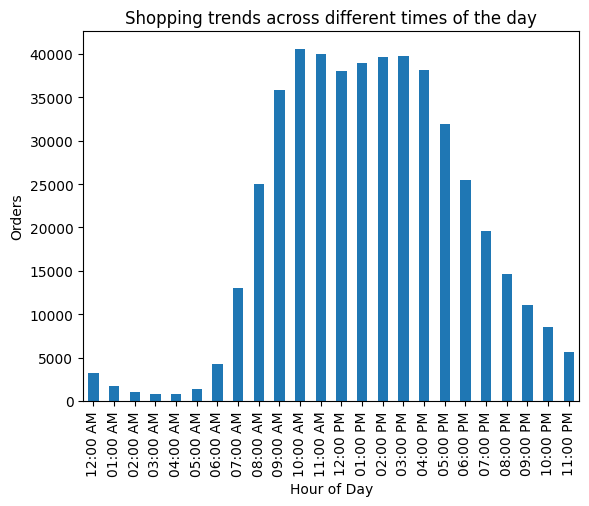

In [34]:
shop_groceries = orders['order_hour_of_day'].value_counts(sort=False).to_frame('count').reset_index().rename(columns={'hour': 'value'})
shop_groceries.columns = ['hour','orders_placed']
shop_groceries['hour'] = pd.to_datetime(shop_groceries['hour'], unit='h')
shop_groceries['hour'] = shop_groceries['hour'].dt.strftime('%I:%M %p')

shop_groceries.plot(x='hour',
        kind='bar',
        title='Shopping trends across different times of the day',
        xlabel='Hour of Day',
        ylabel='Orders',
        legend = False)


print(shop_groceries)
plt.show()

Most orders occur between 9:00 AM and 5:00 PM, with peaks at 10:00 AM and 3:00 PM

### [A3] What day of the week do people shop for groceries?

To figure out what day of the week people shop for groceries, analyze the order_dow column in the orders dataset. Use .value_counts() to count the number of orders for each day of the week, and then sort the results by the day index to maintain the correct order.

Visualize the data with a bar plot to clearly observe shopping patterns across the days of the week.

         day  orders_placed
0     Sunday          84090
1     Monday          82185
2    Tuesday          65833
3  Wednesday          60897
4   Thursday          59810
5     Friday          63488
6   Saturday          62649


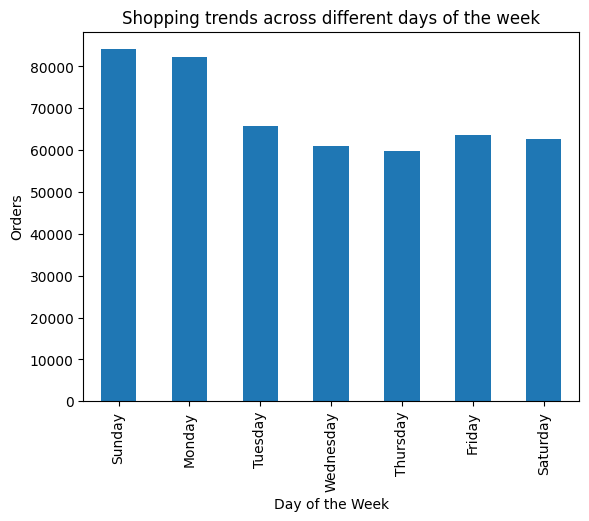

In [35]:
shop_groceries_day = orders['order_dow'].value_counts(sort=False).to_frame('count').reset_index().rename(columns={'day': 'value'})
shop_groceries_day.columns = ['day','orders_placed']
day_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6:'Saturday' }
shop_groceries_day['day'] = shop_groceries_day['day'].map(day_map)


shop_groceries_day.plot(x='day',
        kind='bar',
        title='Shopping trends across different days of the week',
        xlabel='Day of the Week',
        ylabel='Orders',
        legend = False)


print(shop_groceries_day)
plt.show()

The data dictionary does not state which integer corresponds to which day of the week. Assuming Sunday = 0, then people place more orders at the beginning of the week (Sunday and Monday).

### [A4] How long do people wait until placing another order?

To understand how long people wait before placing another order, analyze the days_since_prior_order column in the orders dataset. Use .value_counts() to count how many orders were placed for each interval of days, then sort the results by the number of days for clarity.

Visualize the data using a bar plot to observe patterns in ordering frequency over time.

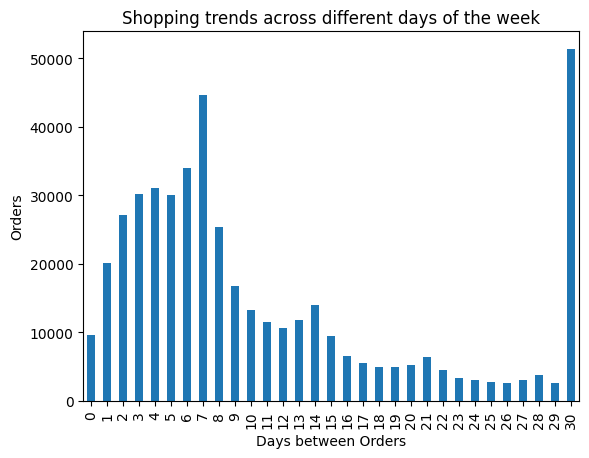

In [36]:
days_between = orders['days_since_prior_order'].value_counts().sort_index().to_frame('count').reset_index()
days_between.columns = ['days','orders_placed']
days_between['days']= days_between['days'].astype('int')

days_between.plot(x='days',
        kind='bar',
        title='Shopping trends across different days of the week',
        xlabel='Days between Orders',
        ylabel='Orders',
        legend = False)
        


plt.show()

The 0 values probably correspond to customers who placed more than one order on the same day.

The max value of 30 days and the high spike at that value is puzzling though. The spike might be explained by people who set up recurring subscriptions to automatically order once a month. But that doesn't explain why there are no values above 30 days. I would expect many customers to place orders less often than once a month. Maybe those customers were intentionally excluded from the dataset.

Disregarding the spike at 30 days, most people wait between 2 to 10 days in between orders. The most common wait time is 7 days. In other words, it's common for people to place weekly grocery orders. Interestingly, in the tail of the distribution we also see small spikes at 14, 21, and 28 days. These would correspond to orders every 2, 3, or 4 weeks.

# [B] Medium 

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

To determine if there’s a difference in the `order_hour_of_day` distributions on Wednesdays and Saturdays, follow these steps:

1. **Create masks** for Wednesday (`order_dow == 3`) and Saturday (`order_dow == 6`) to filter the orders data.
2. **Count the order hours** for each day using `.value_counts()` and sort them by hour with `.sort_index()` for clarity.
3. **Combine the counts** for both days into a single DataFrame using `pd.concat()`, and label the columns for easier interpretation.

After preparing the data, plot histograms for both days to visually compare the distribution of order times. Look for patterns such as peaks or differences in the busiest times.

In [37]:
mask_weds = orders[orders['order_dow'] == 3]
mask_sat = orders[orders['order_dow'] == 6]

In [38]:
orders_weds = mask_weds['order_hour_of_day'].value_counts().sort_index().to_frame('wednesday_orders_by_hour')
orders_sat = mask_sat['order_hour_of_day'].value_counts().sort_index().to_frame('saturday_orders_by_hour')


In [39]:
both_days = pd.concat([orders_weds, orders_sat], axis='columns')
both_days.columns = ['wednesday','saturday']

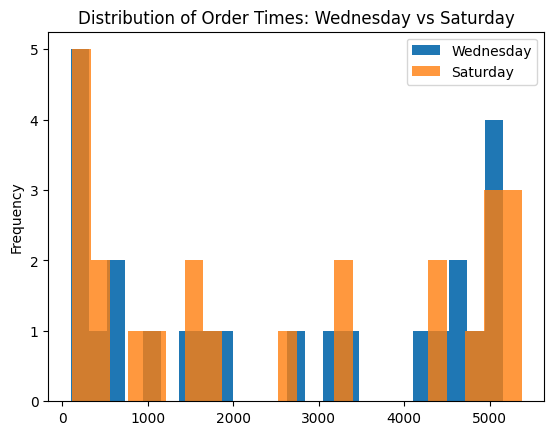

In [40]:
both_days['wednesday'].plot(kind='hist',title ='Distribution of Order Times: Wednesday vs Saturday',  bins=24)
both_days['saturday'].plot(kind='hist',  bins=24, alpha=0.8)
plt.legend(['Wednesday', 'Saturday'])
plt.show()#Using Hist... Don't think it is useful to those reading the graph 

This Visual is difficult to read!
Let's make a bar graph Histogram instead!

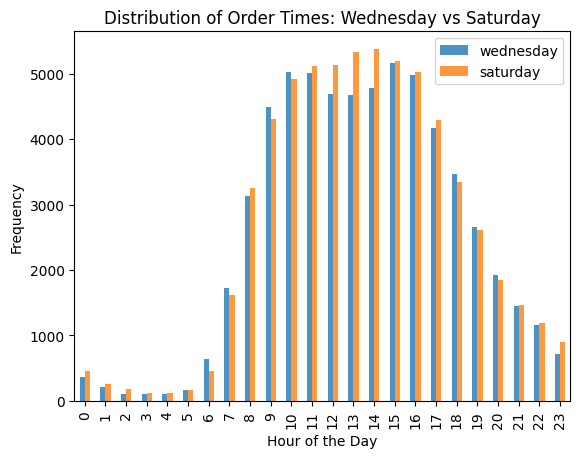

In [41]:
both_days.plot(
        kind='bar',
        title='Distribution of Order Times: Wednesday vs Saturday',
        alpha = 0.8,
        xlabel='Hour of the Day',
        ylabel='Frequency',
        legend = ['Wednesday', 'Saturday'])
plt.show()

There's a small dip from 11h to 13h on Wednesdays. This dip is absent on Saturdays. Maybe this dip can be attributed to people who don't use Instacart because they have lunch somewhere between 11h and 13h.

### [B2] What's the distribution for the number of orders per customer?

To explore the distribution of the number of orders per customer:

1. **Group the data** by `user_id` to calculate the total number of orders for each customer. Use `.groupby('user_id')` and count the `order_id` for each group.
2. **Sort the results** using `.sort_values()` for better readability.
3. **Visualize the distribution** using a histogram to observe how many orders most customers typically place.

Adjust the number of bins in the histogram to refine the visualization and better capture the pattern.

In [42]:
order_x_customer = orders.groupby('user_id')['order_id'].count().sort_values().reset_index()
order_x_customer.columns = ['customer', 'count']
order_x_customer['customer'] = order_x_customer['customer'].astype('category')

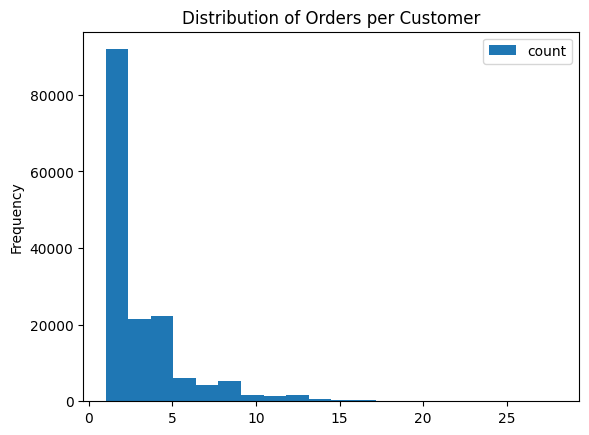

In [43]:
order_x_customer.plot(kind='hist',title ='Distribution of Orders per Customer',  bins=20, xlabel = "Orders per Customer" )

plt.show()

Most customers in the dataset have placed between 1 and 10 orders, with number of orders per customer sharply decreasing after just 1 order.

### [B3] What are the top 20 popular products (display their id and name)?

To identify the top 20 most popular products:

1. **Merge the datasets**: Combine `order_products` and `products` on `product_id` to access both the product IDs and names in a single DataFrame.
2. **Group the data**: Group by both `product_id` and `product_name` to aggregate the order counts for each product using `.size()`.
3. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their popularity.
4. **Display the top 20**: Use `.head(20)` to focus on the most frequently ordered products.
5. **Visualize the results**: Create a bar chart to highlight the top products and their order counts.

This will give you a clear view of the most popular products and their ranking.


In [44]:
df_top_prod = order_products.merge(products,on = 'product_id' ) 


In [45]:
top_prod = df_top_prod.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
top_prod_results = top_prod.head(20)
print(top_prod_results)

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
dtype: int64


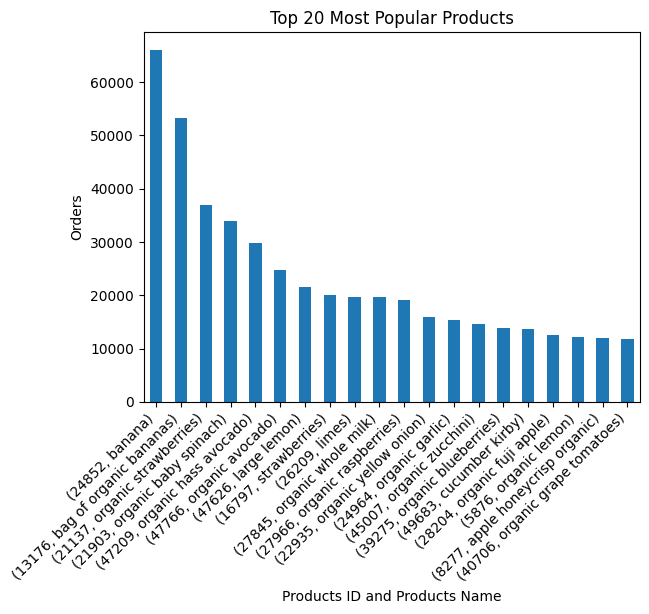

In [46]:

top_prod_results.plot(kind = 'bar',
                     title='Top 20 Most Popular Products',
                     xlabel='Products ID and Products Name',
                     ylabel='Orders'
                     )
plt.xticks(rotation=45, ha='right')
plt.show()

The top 20 items are all produce, except for the milk. Looks like people want delicious and nutritious!

# [C] Hard 

### [C1] How many items do people typically buy in one order? What does the distribution look like?
To analyze how many items people typically buy in one order:

1. **Group the data** by `order_id` and count the number of products (`product_id`) in each order using `.count()`. This gives the number of items in each order.
2. **Aggregate the counts**: Use `.value_counts()` to determine how frequently different order sizes occur, and then sort the results with `.sort_index()` to organize by the number of items.
3. **Visualize the distribution**: Use a bar plot to show the frequency of orders for each size, with the x-axis representing the number of items and the y-axis representing the number of orders.

This will help you understand the typical size of a grocery order and identify any trends in purchasing behavior.

In [47]:
orders_in_one =  order_products.groupby('order_id')['product_id'].count().value_counts().sort_index()



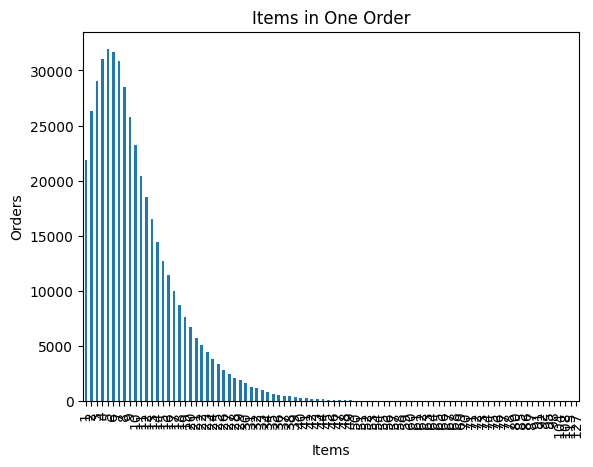

In [48]:
orders_in_one.plot(kind = 'bar',
                     title='Items in One Order',
                     xlabel='Items',
                     ylabel='Orders',
                     figsize=(18, 8)
                    
                     )
plt.show()

Most of the order numbers are in the tail of the distribution. To get a better look at the non-tail part, let's choose a value in the tail as a cutoff and just plot order with fewer than that many items. An order size of 35 items is far enough into the tail for this.

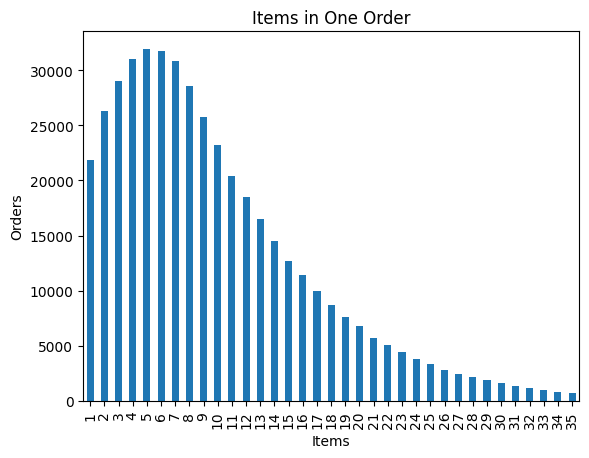

In [49]:
orders_in_one = orders_in_one.head(35)
orders_in_one.plot(kind = 'bar',
                     title='Items in One Order',
                     xlabel='Items',
                     ylabel='Orders'
                     )
                     

plt.show()

The typical order contains 5 or 6 items, with most orders having between 1 and 20 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

To find the top 20 most frequently reordered items:

1. **Filter the data**: Use `order_products['reordered'] == 1` to isolate only the products that have been reordered.
2. **Merge the datasets**: Combine the filtered `order_products` with the `products` dataset on `product_id` to get both the product names and IDs.
3. **Group the data**: Group by both `product_id` and `product_name` to calculate how many times each product was reordered, using `.size()`.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank the products by reorder frequency.
5. **Display the top 20**: Use `.head(20)` to focus on the most frequently reordered products.
6. **Visualize the data**: Create a bar chart to showcase the top reordered items and their frequencies.

This process highlights the products that customers consistently return to and reorder.

In [50]:
reordered_prod = order_products[order_products['reordered'] == 1]
reordered_prod = reordered_prod.merge(products, on = 'product_id' )


In [51]:
top_reordered_prod = reordered_prod.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)


In [52]:
top_20_reordered_prod = top_reordered_prod.head(20)
print(top_20_reordered_prod)

product_id  product_name            
24852       banana                      55763
13176       bag of organic bananas      44450
21137       organic strawberries        28639
21903       organic baby spinach        26233
47209       organic hass avocado        23629
47766       organic avocado             18743
27845       organic whole milk          16251
47626       large lemon                 15044
27966       organic raspberries         14748
16797       strawberries                13945
26209       limes                       13327
22935       organic yellow onion        11145
24964       organic garlic              10411
45007       organic zucchini            10076
49683       cucumber kirby               9538
28204       organic fuji apple           8989
8277        apple honeycrisp organic     8836
39275       organic blueberries          8799
5876        organic lemon                8412
49235       organic half & half          8389
dtype: int64


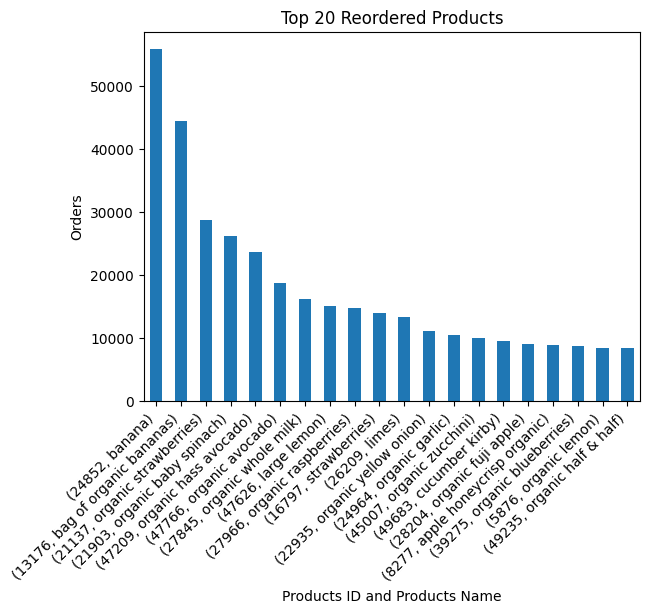

In [53]:

top_20_reordered_prod.plot(kind = 'bar',
                     title='Top 20 Reordered Products',
                     xlabel='Products ID and Products Name',
                     ylabel='Orders'
                     )
plt.xticks(rotation=45, ha='right')
plt.show()

It looks like produce and dairy comprise the most reordered products as well. It makes sense that perishables would be the most reordered items.

### [C3] For each product, what proportion of its orders are reorders?

To calculate the proportion of orders for each product that are reorders:

1. **Merge the datasets**: Combine `order_products` with the `products` dataset to access product names and IDs in the same DataFrame.
2. **Group the data**: Group by `product_id` and `product_name` to isolate each product's order history.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to compute the proportion of orders for each product that were reorders. The value represents the reorder rate.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to organize the grouped data into a readable DataFrame.
6. **Optional Sorting**: Sort the results by `product_id` or another column for better clarity.

This approach provides insights into how frequently each product is reordered, helping identify customer favorites or staples.


In [54]:
reorder_data = order_products.merge(products, on = 'product_id' )

In [55]:
reordered_mean = reorder_data.groupby(['product_id', 'product_name'])['reordered'].mean().sort_values(ascending=False)

print(reordered_mean.head(10))

product_id  product_name                                                           
18121       jalapenos with sea salt                                                    1.0
27387       banana greek nonfat yogurt                                                 1.0
17773       quinoa- with olive oil                                                     1.0
49063       rosemary & sea salt crackers                                               1.0
14935       kombucha blueberry basil                                                   1.0
49062       superior preference fade-defying color + shine system - 5 medium  brown    1.0
5924        pearls elite extra strength probiotics dietary supplement                  1.0
42050       ultragrain tortillas 8 taco size                                           1.0
42038       scalp intensive treatment                                                  1.0
14802       black pepper chicken                                                       1.0
Name: 

In [56]:
reordered_mean = reordered_mean.reset_index().sort_values(by='product_id', ascending=False)

print(reordered_mean.head(20))

       product_id                                product_name  reordered
34870       49688                      fresh foaming cleanser   0.111111
38360       49687  smartblend healthy metabolism dry cat food   0.000000
8600        49686                            artisan baguette   0.625000
17853       49685          en croute roast hazelnut cranberry   0.500000
38357       49684   vodka- triple distilled- twist of vanilla   0.000000
4893        49683                              cucumber kirby   0.697477
19654       49682                          california limeade   0.461538
3505        49681     spaghetti with meatballs and sauce meal   0.750000
28949       49680          all natural creamy caesar dressing   0.285714
31974       49679                     famous chocolate wafers   0.214286
19426       49678             large chicken & cheese taquitos   0.466667
20063       49677             thick & chunky sloppy joe sauce   0.454545
21559       49676                      ultra red en

### [C4] For each customer, what proportion of their products ordered are reorders?

To calculate the proportion of products reordered by each customer:

1. **Merge the datasets**: Combine `order_products` with `orders` to link order and customer information.
2. **Group the data**: Group by `user_id` to focus on each customer's ordering behavior.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to determine the proportion of products reordered by each customer.
4. **Sort the results**: Use `.sort_values(ascending=False)` to identify customers with the highest reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to format the grouped data into a structured DataFrame for further analysis.

This analysis reveals the extent to which individual customers reorder products, providing insights into customer loyalty and preferences.


In [57]:
cust_reorder_data = order_products.merge(orders, on = 'order_id' )
cust_reorder_data = cust_reorder_data.groupby('user_id')['reordered'].mean().sort_values(ascending=False)


In [58]:
cust_reorder_data = cust_reorder_data.reset_index()
print(cust_reorder_data.head(30))

    user_id  reordered
0    137587        1.0
1    173474        1.0
2     13918        1.0
3     62300        1.0
4     62307        1.0
5     96301        1.0
6     62312        1.0
7     48616        1.0
8     62316        1.0
9    191162        1.0
10    96310        1.0
11   135349        1.0
12    96321        1.0
13    42811        1.0
14    74363        1.0
15   135307        1.0
16    32600        1.0
17    32597        1.0
18    96349        1.0
19    62327        1.0
20    13962        1.0
21    96300        1.0
22    32614        1.0
23    13911        1.0
24    32633        1.0
25   198284        1.0
26    62213        1.0
27    13844        1.0
28   135533        1.0
29    74382        1.0


### [C5] What are the top 20 items that people put in their carts first?

To identify the top 20 items that people most frequently add to their carts first:

1. **Merge the datasets**: Combine `order_products` with `products` to link product names and IDs.
2. **Filter the data**: Focus on rows where `add_to_cart_order` equals 1, indicating the first item added to the cart.
3. **Group the data**: Group by `product_id` and `product_name` to aggregate the count of how often each product was the first in a cart.
4. **Count occurrences**: Use `.count()` to calculate the total number of times each product was the first added.
5. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their first-in-cart frequency.
6. **Display the top 20**: Use `.head(20)` to extract the most popular first-in-cart items.

This provides insights into which products customers prioritize in their shopping process.


In [59]:
first_in_cart = order_products.merge(products, on = 'product_id' )

first_in_cart = first_in_cart[first_in_cart['add_to_cart_order']==1]



In [60]:
first_in_cart = first_in_cart.groupby(['product_id', 'product_name'])['add_to_cart_order'].size().sort_values(ascending=False)


In [61]:
top_20_first_in_cart =first_in_cart.head(20)
print(top_20_first_in_cart)

product_id  product_name               
24852       banana                         15562
13176       bag of organic bananas         11026
27845       organic whole milk              4363
21137       organic strawberries            3946
47209       organic hass avocado            3390
21903       organic baby spinach            3336
47766       organic avocado                 3044
19660       spring water                    2336
16797       strawberries                    2308
27966       organic raspberries             2024
44632       sparkling water grapefruit      1914
49235       organic half & half             1797
47626       large lemon                     1737
196         soda                            1733
38689       organic reduced fat milk        1397
26209       limes                           1370
12341       hass avocados                   1340
5785        organic reduced fat 2% milk     1310
27086       half & half                     1309
43352       raspberries      

The products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water. I couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products. I do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types. It could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.

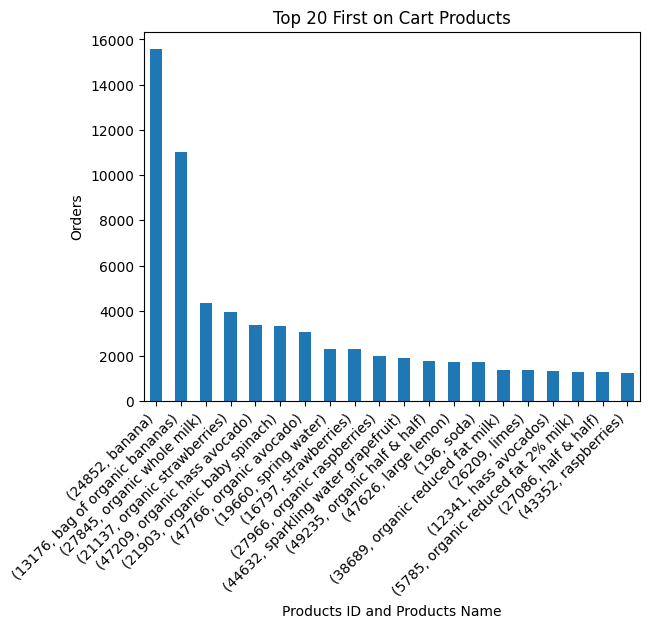

In [62]:
top_20_first_in_cart.plot(kind = 'bar',
                     title='Top 20 First on Cart Products',
                     xlabel='Products ID and Products Name',
                     ylabel='Orders'
                     )
plt.xticks(rotation=45, ha='right')
plt.show()

## 🛒 Conclusion: Grocery Shopping Behavior Insights

Based on the analysis of the Instacart dataset, several clear trends emerge about customer shopping behavior:

### ⏰ Shopping Time Preferences
- Most grocery shopping occurs **between 9:00 AM and 5:00 PM**, with noticeable **peaks at 10:00 AM and 3:00 PM**.
- Early morning hours (before 7:00 AM) and late-night hours (after 9:00 PM) see significantly fewer orders.

### 📅 Shopping Days
- The most popular shopping days are **Sunday and Monday**, suggesting that customers prefer to restock at the **start of the week**.
- **Midweek days** (Tuesday–Thursday) see lower activity, possibly indicating customers have already stocked up.

### 🔁 Reorder Timing
- Most customers reorder **within a week**, with a noticeable spike at **30 days**, possibly due to **monthly subscriptions**.
- No data is available for intervals longer than 30 days, which may indicate **truncation or dataset filtering**.

### 🧍‍♂️ Per-Customer Behavior
- The majority of customers place **1 to 10 orders**, with a steep drop-off after the first few orders.
- Most orders contain **5 to 6 items**, and nearly all orders include **1 to 20 items**.
- Customers tend to **reorder the same items**, with many users showing **high reorder rates** (even 100%).

### 🥑 Popular & Reordered Products
- **Fresh produce** (bananas, strawberries, spinach) dominates the list of **most popular** and **most reordered** items.
- Perishable staples like **organic milk** and **avocados** are frequently reordered, indicating routine shopping habits.

### 🛒 First Cart Items
- The same fresh produce items (bananas, organic bananas) are also the **most common first items added to carts**, reflecting their priority in shopping trips.

### 📊 Day-Specific Patterns
- On **Wednesdays**, there's a dip in orders between **11 AM to 1 PM**, possibly due to lunch breaks.
- **Saturdays** do not show this dip, indicating **more consistent shopping behavior** throughout the day.

---

These insights can help businesses optimize inventory, delivery scheduling, and marketing strategies around customer routines and preferences.
